# Project - Enron Dataset Investigation

In [1]:
import sys
import pickle
import os
import pandas as pd
import numpy as np
sys.path.append(os.path.abspath(("../tools/")))

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
### define some functions if it needs to be called for multiple times
def print_uniq_val(df):
    for col in df.columns:
        print(col,':',df[col].unique())

## Task 1: Select what features you'll use.
> features_list is a list of strings, each of which is a feature name.
> The first feature must be "poi".
> Not yet to select the features for training
> this step will be applied with a feature selection model
> features_list = ['poi','salary'] # You will need to use more features

In [3]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

## Task 2: Remove outliers

> For a better data analysis, turn the dictionary into dataframe.

In [4]:
## turn the dictionary into dataframe to have better look
pd.set_option('display.max_columns',100)
df = pd.DataFrame(data_dict).T
## now we could see that mostly that 'NaN' should be replaced or imputed
df.replace('NaN',np.nan, inplace=True)

In [5]:
## take a look at the raw dataset
df.sample(10)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,kenneth.lay@enron.com,NaN,-300000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,True,3600000.0,2411.0,14761694.0,NaN
LOWRY CHARLES P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-153686.0,NaN,372205.0,NaN,NaN,372205.0,NaN,NaN,NaN,False,NaN,NaN,153686.0,NaN
SHELBY REX,211844.0,225.0,NaN,2003885.0,NaN,200000.0,rex.shelby@enron.com,NaN,-4167.0,2493616.0,22884.0,13.0,1624396.0,39.0,1573324.0,14.0,True,NaN,91.0,869220.0,NaN
BHATNAGAR SANJAY,NaN,523.0,NaN,15456290.0,NaN,NaN,sanjay.bhatnagar@enron.com,15456290.0,NaN,NaN,NaN,0.0,2604490.0,29.0,137864.0,1.0,False,NaN,463.0,-2604490.0,137864.0
YEAP SOON,NaN,NaN,NaN,55097.0,NaN,NaN,NaN,NaN,NaN,192758.0,55097.0,NaN,192758.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
SKILLING JEFFREY K,1111258.0,3627.0,NaN,8682716.0,NaN,5600000.0,jeff.skilling@enron.com,NaN,NaN,26093672.0,29336.0,88.0,19250000.0,108.0,22122.0,30.0,True,1920000.0,2042.0,6843672.0,NaN
CAUSEY RICHARD A,415189.0,1892.0,NaN,1868758.0,NaN,1000000.0,richard.causey@enron.com,NaN,-235000.0,2502063.0,30674.0,58.0,NaN,49.0,307895.0,12.0,True,350000.0,1585.0,2502063.0,NaN
PIPER GREGORY F,197091.0,1238.0,1130036.0,1737629.0,NaN,400000.0,greg.piper@enron.com,-409554.0,-33333.0,880290.0,43057.0,61.0,880290.0,222.0,778.0,48.0,False,NaN,742.0,409554.0,NaN
OLSON CINDY K,329078.0,1184.0,77716.0,1321557.0,NaN,750000.0,cindy.olson@enron.com,NaN,NaN,2606763.0,63791.0,20.0,1637034.0,52.0,972.0,15.0,False,100000.0,856.0,969729.0,NaN
GOLD JOSEPH,272880.0,NaN,NaN,2146973.0,NaN,750000.0,joe.gold@enron.com,NaN,NaN,877611.0,NaN,NaN,436515.0,NaN,819288.0,NaN,False,304805.0,NaN,441096.0,NaN


In [6]:
## see what would the data look like after dropna
df.dropna(axis=0)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees


> we can see that if to dropna, the valid column is only poi.
> Plan B, data imputation, needs to be applied
> here in this dataframe, only email_address is string dtype and others are numeric actually
> It is arguable to apply data imputation may give a misleading indicator on pois,
> but so far it is the option.

In [7]:
## check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     95 non-null     float64
 1   to_messages                86 non-null     float64
 2   deferral_payments          39 non-null     float64
 3   total_payments             125 non-null    float64
 4   loan_advances              4 non-null      float64
 5   bonus                      82 non-null     float64
 6   email_address              111 non-null    object 
 7   restricted_stock_deferred  18 non-null     float64
 8   deferred_income            49 non-null     float64
 9   total_stock_value          126 non-null    float64
 10  expenses                   95 non-null     float64
 11  from_poi_to_this_person    86 non-null     float64
 12  exercised_stock_options    102 non-null    float64
 13  from_messages              86 non-

> Check the number of null values in each column

In [8]:
df.isnull().sum().sort_values()

poi                            0
total_stock_value             20
total_payments                21
email_address                 35
restricted_stock              36
exercised_stock_options       44
salary                        51
expenses                      51
other                         53
from_poi_to_this_person       60
from_messages                 60
from_this_person_to_poi       60
to_messages                   60
shared_receipt_with_poi       60
bonus                         64
long_term_incentive           80
deferred_income               97
deferral_payments            107
restricted_stock_deferred    128
director_fees                129
loan_advances                142
dtype: int64

> Looking at the columns, the minimal null values in float type are
> * total_stock_value
> * total_payments
> * restricted_stock
> * excercised_stock_options
> * salary
> * expenses
> * from_poi_to_this_person to bonus
> Since these columns are with the lowest null values. To minimise the effect of data imputation, those column candidates are prioritised.

In [9]:
# sort the number of null values and get the feature names
feature_low_null = df.isnull().sum().sort_values().keys()
# select the top 12 columns with the least null values
feature_low_null[:12]
# actively remove some columns that are not very informative
feature_low_null = [col for col in feature_low_null if col not in ['email_address','other']]

> Now I have selected the top 10 columns with the lowest null values. Now keep these selected columns only in the dataframe

In [10]:
df = df[feature_low_null]
df.head()

,poi,total_stock_value,total_payments,restricted_stock,exercised_stock_options,salary,expenses,from_poi_to_this_person,from_messages,from_this_person_to_poi,to_messages,shared_receipt_with_poi,bonus,long_term_incentive,deferred_income,deferral_payments,restricted_stock_deferred,director_fees,loan_advances
METTS MARK,False,585062.0,1061827.0,585062.0,NaN,365788.0,94299.0,38.0,29.0,1.0,807.0,702.0,600000.0,NaN,NaN,NaN,NaN,NaN,NaN
BAXTER JOHN C,False,10623258.0,5634343.0,3942714.0,6680544.0,267102.0,11200.0,NaN,NaN,NaN,NaN,NaN,1200000.0,1586055.0,-1386055.0,1295738.0,NaN,NaN,NaN
ELLIOTT STEVEN,False,6678735.0,211725.0,1788391.0,4890344.0,170941.0,78552.0,NaN,NaN,NaN,NaN,NaN,350000.0,NaN,-400729.0,NaN,NaN,NaN,NaN
CORDES WILLIAM R,False,1038185.0,NaN,386335.0,651850.0,NaN,NaN,10.0,12.0,0.0,764.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HANNON KEVIN P,True,6391065.0,288682.0,853064.0,5538001.0,243293.0,34039.0,32.0,32.0,21.0,1045.0,1035.0,1500000.0,1617011.0,-3117011.0,NaN,NaN,NaN,NaN


> to minimise the effect of missing values in classification, filling values with median strategy may be the best option.
> However, this may be tuned as per the ML outcomes

In [11]:
## select the float columns to apply imputation
num_col = [col for col in df.columns if df[col].dtype == float]
col_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
## data imputation
df[num_col] = col_imputer.fit_transform(df[num_col])
df.sample(5)

,poi,total_stock_value,total_payments,restricted_stock,exercised_stock_options,salary,expenses,from_poi_to_this_person,from_messages,from_this_person_to_poi,to_messages,shared_receipt_with_poi,bonus,long_term_incentive,deferred_income,deferral_payments,restricted_stock_deferred,director_fees,loan_advances
BELDEN TIMOTHY N,True,1110705.0,5501630.0,157569.0,953136.0,213999.0,17355.0,228.0,484.0,108.0,7991.0,5521.0,5249999.0,554422.0,-2334434.0,2144013.0,-7576788.0,3285.0,400000.0
KEAN STEVEN J,False,6153642.0,1747522.0,4131594.0,2022048.0,404338.0,41953.0,140.0,6759.0,387.0,12754.0,3639.0,1000000.0,300000.0,-25000.0,-102500.0,-7576788.0,3285.0,400000.0
BERBERIAN DAVID,False,2493616.0,228474.0,869220.0,1624396.0,216582.0,11892.0,0.0,12.0,0.0,57.0,23.0,600000.0,554422.0,-25000.0,-102500.0,-7576788.0,3285.0,400000.0
GRAY RODNEY,False,126027.0,1146658.0,126027.0,1624396.0,6615.0,16514.0,0.0,12.0,0.0,57.0,23.0,600000.0,365625.0,-25000.0,93585.0,-7576788.0,3285.0,400000.0
HAEDICKE MARK E,False,803094.0,3859065.0,524169.0,608750.0,374125.0,76169.0,180.0,1941.0,61.0,4009.0,1847.0,1150000.0,983346.0,-934484.0,2157527.0,-329825.0,3285.0,400000.0


In [12]:
## check the nan values again
print(df.isnull().sum().sum())
df.shape

0


(146, 19)

In [13]:
## check the basic stats
df.describe()

,total_stock_value,total_payments,restricted_stock,exercised_stock_options,salary,expenses,from_poi_to_this_person,from_messages,from_this_person_to_poi,to_messages,shared_receipt_with_poi,bonus,long_term_incentive,deferred_income,deferral_payments,restricted_stock_deferred,director_fees,loan_advances
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02
mean,5.863282e+06,4.350643e+06,1.780332e+06,4.672280e+06,4.631309e+05,7.651686e+04,38.226027,363.534247,24.287671,1245.013699,702.438356,1.596488e+06,9.684768e+05,-3.993718e+05,3.636767e+05,-6.622147e+06,2.232499e+04,1.538699e+06
std,3.624403e+07,2.693448e+07,1.089507e+07,2.600195e+07,2.191304e+06,4.318379e+05,73.901124,1440.036044,79.278206,2213.972467,1066.865425,8.055822e+06,4.005087e+06,2.375586e+06,2.753782e+06,2.931713e+06,1.185812e+05,9.602781e+06
min,-4.409300e+04,1.480000e+02,-2.604490e+06,3.285000e+03,4.770000e+02,1.480000e+02,0.000000,12.000000,0.000000,57.000000,2.000000,7.000000e+04,6.922300e+04,-2.799289e+07,-1.025000e+05,-7.576788e+06,3.285000e+03,4.000000e+05
25%,2.288695e+05,9.394475e+04,1.260270e+05,7.578650e+05,2.398005e+05,1.651400e+04,0.000000,12.000000,0.000000,57.000000,23.000000,6.000000e+05,5.441688e+05,-3.792600e+04,-1.025000e+05,-7.576788e+06,3.285000e+03,4.000000e+05
50%,9.659550e+05,9.413595e+05,3.605280e+05,1.624396e+06,2.786010e+05,2.018200e+04,2.500000,16.500000,0.000000,289.000000,102.500000,6.000000e+05,5.544220e+05,-2.500000e+04,-1.025000e+05,-7.576788e+06,3.285000e+03,4.000000e+05
75%,2.319991e+06,1.968287e+06,8.145280e+05,1.714221e+06,2.786010e+05,5.374075e+04,40.750000,51.250000,13.750000,1585.750000,893.500000,8.000000e+05,5.544220e+05,-2.500000e+04,9.684500e+03,-7.576788e+06,3.285000e+03,4.000000e+05
max,4.345095e+08,3.098866e+08,1.303223e+08,3.117640e+08,2.670423e+07,5.235198e+06,528.000000,14368.000000,609.000000,15149.000000,5521.000000,9.734362e+07,4.852193e+07,-8.330000e+02,3.208340e+07,1.545629e+07,1.398517e+06,8.392500e+07


> As per the basic stats, outliers can be found. For example, both max and min salary are over orders of magnitude higher and lower than the quartile. However, I will still keep those outlier in case of missing important info.

## Task 3: Create new feature(s)

> Extract features and labels from dataset for local testing

> Select the most relevant columns using SelectKBest

In [14]:
## using model to select the most relavant features
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
df_features = df.copy()
df_features.drop(columns=['poi'], axis=1, inplace=True)
df_labels   = df.copy().poi

In [15]:
## get the KBest selector
feature_selector = SelectKBest(mutual_info_classif, k=6)
feature_selector.fit(df_features, df_labels)

SelectKBest(k=6, score_func=<function mutual_info_classif at 0x12f49ef70>)

> Show the selected features

In [16]:
## select the top 5 most relevant columns to poi as per f1 class
features_list = feature_selector.get_feature_names_out().tolist()
features_list = ['poi'] + features_list
features_list

['poi',
 'total_stock_value',
 'expenses',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'bonus',
 'restricted_stock_deferred']

> Store the dataframe to my_dataset for easy export below.

In [17]:
my_dataset = df.T.to_dict()

In [18]:
## in this project I will still use the featureFormat, targetFeaturesSplit
## instead of directly using DataFrame just for project code consistency
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [19]:
## scale the features data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

## Task 4: Try a varity of classifiers
> Please name your classifier clf for easy export below.
> Note that if you want to do PCA or other multi-stage operations,
> you'll need to use Pipelines. For more info:
> http://scikit-learn.org/stable/modules/pipeline.html

In [20]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features,labels)
pred = clf.predict(features)
print('Naive bayes')
print(f'The precision is {precision_score(labels, pred)}')
print(f'The recall is {recall_score(labels, pred)}')

Naive bayes
The precision is 0.140625
The recall is 1.0


In [21]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=10000.0, gamma='auto')
clf.fit(features, labels)
pred = clf.predict(features)
print('SVM classifier')
print(f'The precision is {precision_score(labels, pred)}')
print(f'The recall is {recall_score(labels, pred)}')

SVM classifier
The precision is 1.0
The recall is 0.2222222222222222


In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_leaf=1)
clf.fit(features, labels)
pred = clf.predict(features)
print('Decision tree classifier')
print(f'The precision is {precision_score(labels, pred)}')
print(f'The recall is {recall_score(labels, pred)}')

Decision tree classifier
The precision is 1.0
The recall is 1.0


In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=1)
clf.fit(features, labels)
pred = clf.predict(features)
print('Random Forest Classifier')
print(f'The precision is {precision_score(labels, pred)}')
print(f'The recall is {recall_score(labels, pred)}')

Random Forest Classifier
The precision is 1.0
The recall is 1.0


In [24]:
clf = AdaBoostClassifier(n_estimators=127, learning_rate=0.22)
clf.fit(features, labels)
pred = clf.predict(features)
print('AdaBoost Classifier')
print(f'The precision is {precision_score(labels, pred)}')
print(f'The recall is {recall_score(labels, pred)}')

AdaBoost Classifier
The precision is 1.0
The recall is 0.8888888888888888


> The RandomForest, DecisionTree, and AdaBoost give promising results. However, the precision and recall of both RandomForest and DecisionTree are 1 which may be overfitted on the training dataset.

## Task 5: Tune your classifier to achieve better than .3 precision and recall
> using our testing script. Check the tester.py script in the final project
> folder for details on the evaluation method, especially the test_classifier
> function. Because of the small size of the dataset, the script uses
> stratified shuffle split cross validation. For more info:
> http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

> Using train_test_split first

In [25]:
# Example starting point. Try investigating other evaluation techniques!
from sklearn.model_selection import train_test_split, RepeatedKFold
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
del clf
clf = AdaBoostClassifier(n_estimators=10, learning_rate=0.11)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
print('To train: ')
print(f'The precision is {precision_score(labels_test, pred)}')
print(f'The recall is {recall_score(labels_test, pred)}')

To train: 
The precision is 0.4
The recall is 0.6666666666666666


> The precision and recall on train_test_split give a score over 0.3

> Try RepeatedKFold for a more converged precision and recall values

In [26]:
# turn labels into arrray for better using boolean index
labels = np.array(labels)

In [27]:
# Repeated KFold method
rkf = RepeatedKFold(n_splits=2, n_repeats=100, random_state=42)
rkf_precision, rkf_recall = [], []
# split the index for training
for train_index, test_index in rkf.split(features):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    # now fit the data
    clf = AdaBoostClassifier(n_estimators=20, learning_rate=0.21)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    tmp_precision, tmp_recall = precision_score(y_test, pred), recall_score(y_test, pred)
    rkf_precision.append(tmp_precision)
    rkf_recall.append(tmp_recall)    

> Try to visualise the training outcomes

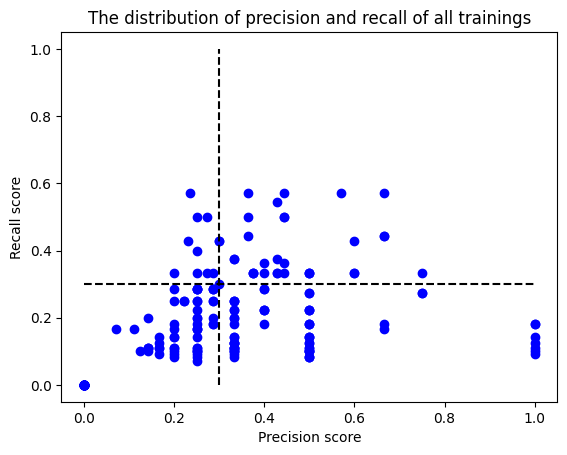

In [28]:
from matplotlib import pyplot as plt
plt.figure()
plt.scatter(rkf_precision, rkf_recall, color='blue')
plt.plot([0,1], [0.3,0.3], color='k', linestyle='--')
plt.plot([0.3,0.3], [0,1], color='k', linestyle='--')
ax = plt.gca()
ax.set_xlabel('Precision score')
ax.set_ylabel('Recall score')
ax.set_title('The distribution of precision and recall of all trainings')
plt.show()

**Summary** After several tunnings, the precision and recall scores are distributed in the required level.

> ### Make a pipeline for the whole training process

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# make the pipeline
clf = Pipeline([
    ('preprocessor', MinMaxScaler()),
    ('classifier', AdaBoostClassifier(n_estimators=20, learning_rate=0.21))
])

In [30]:
# test the pipeline
clf.fit(features_train,labels_train)
clf.score(features_test,labels_test)

0.8863636363636364

## Task 6: 
> Dump your classifier, dataset, and features_list so anyone can
> check your results. You do not need to change anything below, but make sure
> that the version of poi_id.py that you submit can be run on its own and
> generates the necessary .pkl files for validating your results.

In [31]:
dump_classifier_and_data(clf, my_dataset, features_list)